# ROI Stand Alone Service

# 0. Imports

Verander **git_dir** in de map op jouw computer met de code

In [2]:
import os
import sys
import numpy as np
%load_ext autoreload
%autoreload 2

# insert the directory where you extracted the zip file here:
git_dir = r"D:\work\git\GIS_TOOLS"

sys.path.append(os.path.join(git_dir, 'Code'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox/Readers'))

from notebooks.background_scripting.v1.test_connection import TestConnection
test_connection = TestConnection()

Imports are succesfull!


# 1. Model specifications 

## 1.1. Select basemodel
Vul in **folder** de map in waarin de gedownloade modellen staan.
Vervolgens klik je update settings en kan je een model selecteren in de lijst.
Ten slotte klik je wederom op update settings.

In [2]:
from notebooks.background_scripting.v1.select_basemodel import ModelSettings

model_settings = ModelSettings()
model_settings.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Model settings are:'

{
    "folder": "D:\\work\\Project\\P1414\\Models\\Combined",
    "model": "V20_WBD_v1_simulated",
    "scenario_name": "run"
}


## 1.2. Model settings
Kies hier start- en stoptijd van het model, interval om resultaten weg te schrijven en de locatie van het D-HYDRO script _run_dimr.bat_.

In [3]:
import shutil
from notebooks.background_scripting.v1.modify_mdu import ModifyMDU, copy_model

model_path = copy_model(os.path.join(model_settings.settings['folder'], model_settings.settings['model']), model_settings.settings['scenario_name'])
modify_mdu = ModifyMDU(model_path)
modify_mdu.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'MDU settings are:'

{
    "tStart": 0.0,
    "tStop": 168.0,
    "mapInterval": 20.0,
    "DHYDRO location": "C:\\Program Files\\Deltares\\D-HYDRO Suite 2023.01 1D2D\\plugins\\DeltaShell.Dimr\\kernels\\x64\\dimr\\scripts\\run_dimr.bat"
}


## 1.3.1. Dambreak location manual
Kies hieronder zelf een dambreak locatie.

In [ ]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import DambreakWidget

use_template = False
dambreakWidget = DambreakWidget(model_path)
dambreakWidget.draw_map()
# loading the map takes a moment, wait until you see red dams on the map.

## 1.3.2. Dambreak location from template
Kies hieronder een voorbereide Dambreak.

In [4]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import UseTemplateDambreak

use_template = True
dambreak_template = UseTemplateDambreak(model_path)
dambreak_template.draw_map()

Map(center=[51.90698, 4.74042], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

Button(description='Confirm location', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_col…

Output()

HTML(value='<b style="color:black;font-size:18px;"></b>')

## 1.4. Dambreak settings
Specificeer de parameters van de Dambreak

In [5]:
from notebooks.background_scripting.v1.modify_dambreak_v2 import ModifyDambreak

if use_template == False:
    print("using the manually selected dike breach")
    add_dambreak = ModifyDambreak(model_path, dambreakWidget.settings, dambreakWidget.keringen, False, None)
else:
    print("using the dike breach from a template")
    add_dambreak = ModifyDambreak(model_path, None, None, True, dambreak_template.kering_choice)
add_dambreak.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Dambreak settings are:'

{
    "crestLevelIni": 0.0,
    "t0": 0.0,
    "crestLevelMin": -2.0,
    "breachWidthIni": 5.0,
    "f1": 1.3,
    "f2": 0.04,
    "uCrit": 0.2
}


## 1.5. Boundary conditions
Specificeer de randvoorwaarden van het model.

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Boundary conditions are:'

{
    "Waterlevel North Sea": 0.0,
    "Waterlevel Markermeer": 0.0,
    "Rhine basic discharge": 5000.0,
    "Rhine peak discharge": 16000.0,
    "Rhine event start (hour)": 0.0,
    "Rhine event duration (hours)": 168.0
}


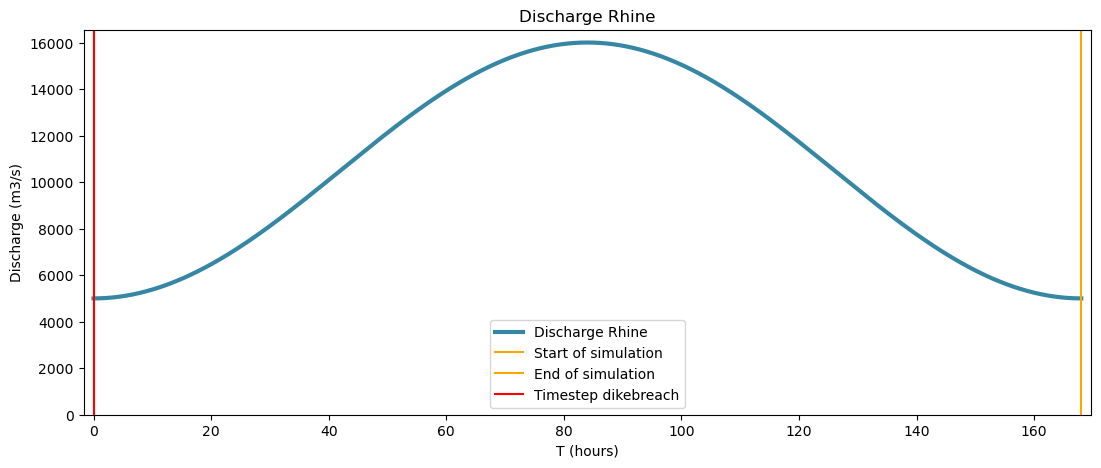

In [6]:
from notebooks.background_scripting.v1.modify_boundaries import ModifyBoundaries, ModifyRhineDischarge

modify_boundaries = ModifyBoundaries(model_path, modify_mdu.settings, add_dambreak.dambreak_settings)
modify_boundaries.display_widgets()

# 2. Run Model
Voer een simulatie uit.

In [7]:
from notebooks.background_scripting.v1.model_runner import ModelRunner

model_runner = ModelRunner(model_path)
model_runner.display_widgets()

Button(description='Run model!', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#3…

Output()

# 3. Post processing

## 3.1. Plot map
Visualiseer de resultaten op kaart.

Button(description='Plot map', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#358…

Output()

'Plot settings are:'

{
    "aggregation_type": "timestep",
    "color_map": "viridis",
    "max_value_legend": 1.0,
    "mesh_resolution": 500.0,
    "min_value_legend": 0.0,
    "output_file_path": "D:\\Work\\Project\\P1414\\Models\\Model_runs\\V20_WBD_v1_simulated_2023-05-07T15-40-46_run\\dflowfm\\output\\post_processing",
    "plot_variable": "Mesh2d_waterdepth",
    "timestep": 168.0
}


HTML(value='<p>Generating plot... (first plot can take a while)</p>')

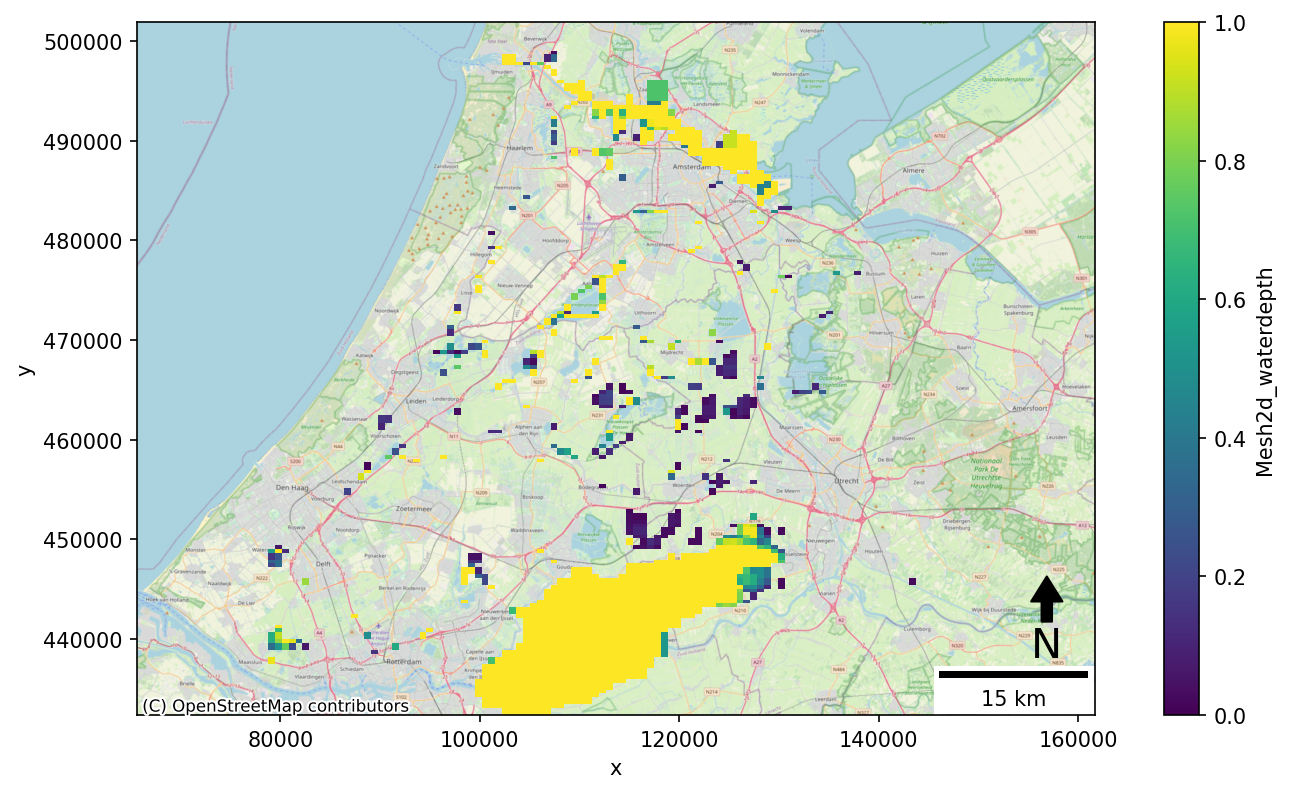

In [3]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsMap, MapPlotter

output_path = os.path.join(model_path, 'dflowfm\output')
plot_settings = PlotSettingsMap(output_path)
plot_settings.display_widgets()

## 3.2. Plot dambreak
Maak grafieken van de dambreak variabelen.

Button(description='Plot breach information', layout=Layout(height='35px', width='99%'), style=ButtonStyle(but…

Output()

'Plot settings are:'

{
    "his_path": "D:\\Work\\Project\\P1414\\Models\\Model_runs\\V20_WBD_v1_simulated_2023-05-07T15-40-46_run\\dflowfm\\output\\DFM_his.nc",
    "output_file_path": "D:\\Work\\Project\\P1414\\Models\\Model_runs\\V20_WBD_v1_simulated_2023-05-07T15-40-46_run\\dflowfm\\output\\post_processing",
    "plot_variables": [
        "dambreak_discharge",
        "dambreak_cumulative_discharge"
    ]
}


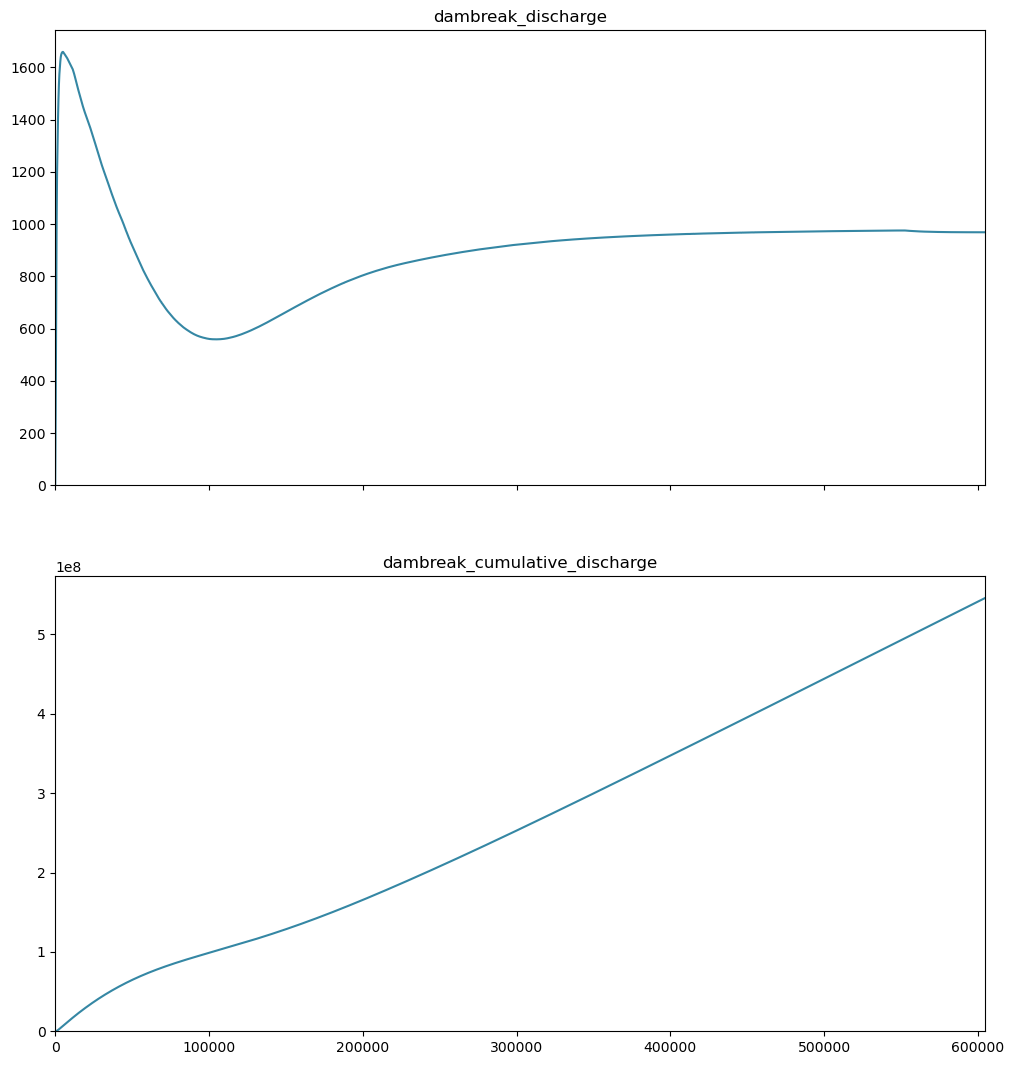

In [10]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsBreach, BreachPlotter

model_path = r"D:\Work\Project\P1414\Models\Model_runs\V20_WBD_v1_simulated_2023-05-07T15-40-46_run"
output_path = os.path.join(model_path, 'dflowfm\output')
plot_settings = PlotSettingsBreach(output_path)
plot_settings.display_widgets()

